In [3]:
! pip install pandas numpy matplotlib seaborn plotly

  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl (12.7 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.4 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.8 MB/s eta 0:00:04
   ------------ ---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the CSV file
df = pd.read_csv("sample_customer.csv")

# DATA EXPLORATION AND INITIAL ANALYSIS

In [3]:

# Basic info about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Review ID           100 non-null    object 
 1   Product Name        100 non-null    object 
 2   Rating              80 non-null     float64
 3   Review Content      92 non-null     object 
 4   Timestamp           100 non-null    object 
 5   Customer Email      100 non-null    object 
 6   Product Category    93 non-null     object 
 7   Order Value         97 non-null     float64
 8   Fulfillment Status  81 non-null     object 
 9   Shipping Country    100 non-null    object 
dtypes: float64(2), object(8)
memory usage: 7.9+ KB
None


In [4]:

# Basic info about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Review ID           100 non-null    object 
 1   Product Name        100 non-null    object 
 2   Rating              80 non-null     float64
 3   Review Content      92 non-null     object 
 4   Timestamp           100 non-null    object 
 5   Customer Email      100 non-null    object 
 6   Product Category    93 non-null     object 
 7   Order Value         97 non-null     float64
 8   Fulfillment Status  81 non-null     object 
 9   Shipping Country    100 non-null    object 
dtypes: float64(2), object(8)
memory usage: 7.9+ KB
None


In [5]:
print("\nData Types:")
print(df.dtypes)



Data Types:
Review ID              object
Product Name           object
Rating                float64
Review Content         object
Timestamp              object
Customer Email         object
Product Category       object
Order Value           float64
Fulfillment Status     object
Shipping Country       object
dtype: object


In [6]:
# Check unique values in categorical columns
print("\nUnique Product Categories:")
print(df['Product Category'].value_counts())


Unique Product Categories:
Product Category
Plus Size Dresses     17
Bridesmaid Dresses    15
Cocktail Dresses      14
Prom Dresses          13
PromDrsses            13
Evening Gowns         12
Cocktail Dreses        9
Name: count, dtype: int64


In [7]:
print("\nUnique Fulfillment Status:")
print(df['Fulfillment Status'].value_counts())



Unique Fulfillment Status:
Fulfillment Status
Cancelled    17
Returned     16
Fufilled     14
Delaye       13
Fulfilled    12
Delayed       9
Name: count, dtype: int64


In [8]:
print("\nRating Distribution:")
print(df['Rating'].value_counts().sort_index())


Rating Distribution:
Rating
1.0    20
2.0    18
3.0    17
4.0    11
5.0    14
Name: count, dtype: int64


# DATA CLEANING FUNCTIONS

In [9]:
def clean_timestamps(df):
    """Clean and standardize timestamps"""
    print("Cleaning timestamps...")
    
    # Convert to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    
    # Check for invalid dates
    invalid_dates = df['Timestamp'].isnull().sum()
    print(f"Found {invalid_dates} invalid timestamps")
    
    # Create additional time features
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['Hour'] = df['Timestamp'].dt.hour
    
    return df

In [10]:
def clean_categories(df):
    """Clean and standardize product categories"""
    print("Cleaning product categories...")
    
    # Create a mapping for category standardization
    category_mapping = {
        'Cocktail Dreses': 'Cocktail Dresses',
        'Cocktail Dresses': 'Cocktail Dresses',
        'PromDrsses': 'Prom Dresses',
        'Prom Dresses': 'Prom Dresses',
        'Plus Size Dresses': 'Plus Size Dresses',
        'Evening Gowns': 'Evening Gowns',
        'Bridesmaid Dresses': 'Bridesmaid Dresses'
    }
    
    # Apply mapping
    df['Product Category'] = df['Product Category'].map(category_mapping).fillna(df['Product Category'])
    
    # Fill missing categories with 'Unknown'
    df['Product Category'] = df['Product Category'].fillna('Unknown')
    
    print("Updated category distribution:")
    print(df['Product Category'].value_counts())
    
    return df

In [11]:
def clean_fulfillment_status(df):
    """Clean and standardize fulfillment status"""
    print("Cleaning fulfillment status...")
    
    # Create mapping for fulfillment status
    status_mapping = {
        'Fulfilled': 'Fulfilled',
        'Fufilled': 'Fulfilled',  # Fix typo
        'Delayed': 'Delayed',
        'Delaye': 'Delayed',      # Fix typo
        'Cancelled': 'Cancelled',
        'Returned': 'Returned'
    }
    
    # Apply mapping
    df['Fulfillment Status'] = df['Fulfillment Status'].map(status_mapping).fillna(df['Fulfillment Status'])
    
    # Fill missing status with 'Unknown'
    df['Fulfillment Status'] = df['Fulfillment Status'].fillna('Unknown')
    
    print("Updated fulfillment status distribution:")
    print(df['Fulfillment Status'].value_counts())
    
    return df


In [12]:
def clean_ratings(df):
    """Clean and handle missing ratings"""
    print("Cleaning ratings...")
    
    # Convert ratings to numeric
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    
    # Count missing ratings
    missing_ratings = df['Rating'].isnull().sum()
    print(f"Found {missing_ratings} missing ratings")
    
    # Option 1: Fill with median rating
    median_rating = df['Rating'].median()
    df['Rating_Imputed'] = df['Rating'].fillna(median_rating)
    
    # Option 2: Create a flag for missing ratings
    df['Rating_Missing'] = df['Rating'].isnull()
    
    # Keep original rating column and create cleaned version
    df['Rating_Clean'] = df['Rating']
    
    print(f"Median rating used for imputation: {median_rating}")
    print("Rating distribution after cleaning:")
    print(df['Rating_Clean'].value_counts().sort_index())
    
    return df

In [13]:
def clean_review_content(df):
    """Clean and filter review content"""
    print("Cleaning review content...")
    
    # Remove leading/trailing whitespace
    df['Review Content'] = df['Review Content'].astype(str).str.strip()
    
    # Create flags for review quality
    df['Review_Empty'] = (df['Review Content'].isnull()) | (df['Review Content'] == '') | (df['Review Content'] == 'nan')
    df['Review_Too_Short'] = df['Review Content'].str.len() < 10  # Less than 10 characters
    df['Review_Length'] = df['Review Content'].str.len()
    
    # Count words in review
    df['Review_Word_Count'] = df['Review Content'].str.split().str.len()
    
    # Flag very short reviews (less than 3 words)
    df['Review_Very_Short'] = df['Review_Word_Count'] < 3
    
    print(f"Empty reviews: {df['Review_Empty'].sum()}")
    print(f"Very short reviews (< 3 words): {df['Review_Very_Short'].sum()}")
    print(f"Too short reviews (< 10 chars): {df['Review_Too_Short'].sum()}")
    
    return df

In [14]:
def clean_order_values(df):
    """Clean order values"""
    print("Cleaning order values...")
    
    # Convert to numeric
    df['Order Value'] = pd.to_numeric(df['Order Value'], errors='coerce')
    
    # Fill missing values with median
    median_order_value = df['Order Value'].median()
    df['Order Value_Imputed'] = df['Order Value'].fillna(median_order_value)
    
    # Create flag for missing order values
    df['Order_Value_Missing'] = df['Order Value'].isnull()
    
    print(f"Missing order values: {df['Order_Value_Missing'].sum()}")
    print(f"Median order value used for imputation: ${median_order_value:.2f}")
    
    return df

In [15]:
def clean_emails(df):
    """Clean and validate email addresses"""
    print("Cleaning email addresses...")
    
    # Basic email validation pattern
    email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    df['Email_Valid'] = df['Customer Email'].str.match(email_pattern, na=False)
    
    print(f"Valid emails: {df['Email_Valid'].sum()}")
    print(f"Invalid emails: {(~df['Email_Valid']).sum()}")
    
    return df

# APPLY ALL CLEANING FUNCTIONS


In [16]:
# Create a copy of the original dataset
df_clean = df.copy()

# Apply all cleaning functions
df_clean = clean_timestamps(df_clean)
df_clean = clean_categories(df_clean)
df_clean = clean_fulfillment_status(df_clean)
df_clean = clean_ratings(df_clean)
df_clean = clean_review_content(df_clean)
df_clean = clean_order_values(df_clean)
df_clean = clean_emails(df_clean)

print("\nCleaning completed!")

Cleaning timestamps...
Found 0 invalid timestamps
Cleaning product categories...
Updated category distribution:
Product Category
Prom Dresses          26
Cocktail Dresses      23
Plus Size Dresses     17
Bridesmaid Dresses    15
Evening Gowns         12
Unknown                7
Name: count, dtype: int64
Cleaning fulfillment status...
Updated fulfillment status distribution:
Fulfillment Status
Fulfilled    26
Delayed      22
Unknown      19
Cancelled    17
Returned     16
Name: count, dtype: int64
Cleaning ratings...
Found 20 missing ratings
Median rating used for imputation: 3.0
Rating distribution after cleaning:
Rating_Clean
1.0    20
2.0    18
3.0    17
4.0    11
5.0    14
Name: count, dtype: int64
Cleaning review content...
Empty reviews: 8
Very short reviews (< 3 words): 9
Too short reviews (< 10 chars): 8
Cleaning order values...
Missing order values: 3
Median order value used for imputation: $296.54
Cleaning email addresses...
Valid emails: 100
Invalid emails: 0

Cleaning comple

# CREATE FILTERED DATASETS

In [17]:

# Create high-quality dataset (remove problematic records)
df_high_quality = df_clean[
    (~df_clean['Review_Empty']) &
    (~df_clean['Review_Very_Short']) &
    (~df_clean['Rating_Missing']) &
    (df_clean['Email_Valid']) &
    (df_clean['Timestamp'].notna())
].copy()

In [18]:
print(f"Original dataset size: {len(df_clean)}")
print(f"High-quality dataset size: {len(df_high_quality)}")
print(f"Records removed: {len(df_clean) - len(df_high_quality)}")

# Create summary statistics
print("\nHigh-Quality Dataset Summary:")
print(f"- Valid ratings: {len(df_high_quality)}")
print(f"- Average rating: {df_high_quality['Rating_Clean'].mean():.2f}")
print(f"- Average order value: ${df_high_quality['Order Value'].mean():.2f}")
print(f"- Average review length: {df_high_quality['Review_Length'].mean():.0f} characters")

Original dataset size: 100
High-quality dataset size: 72
Records removed: 28

High-Quality Dataset Summary:
- Valid ratings: 72
- Average rating: 2.81
- Average order value: $287.52
- Average review length: 72 characters


# DATA VISUALIZATION


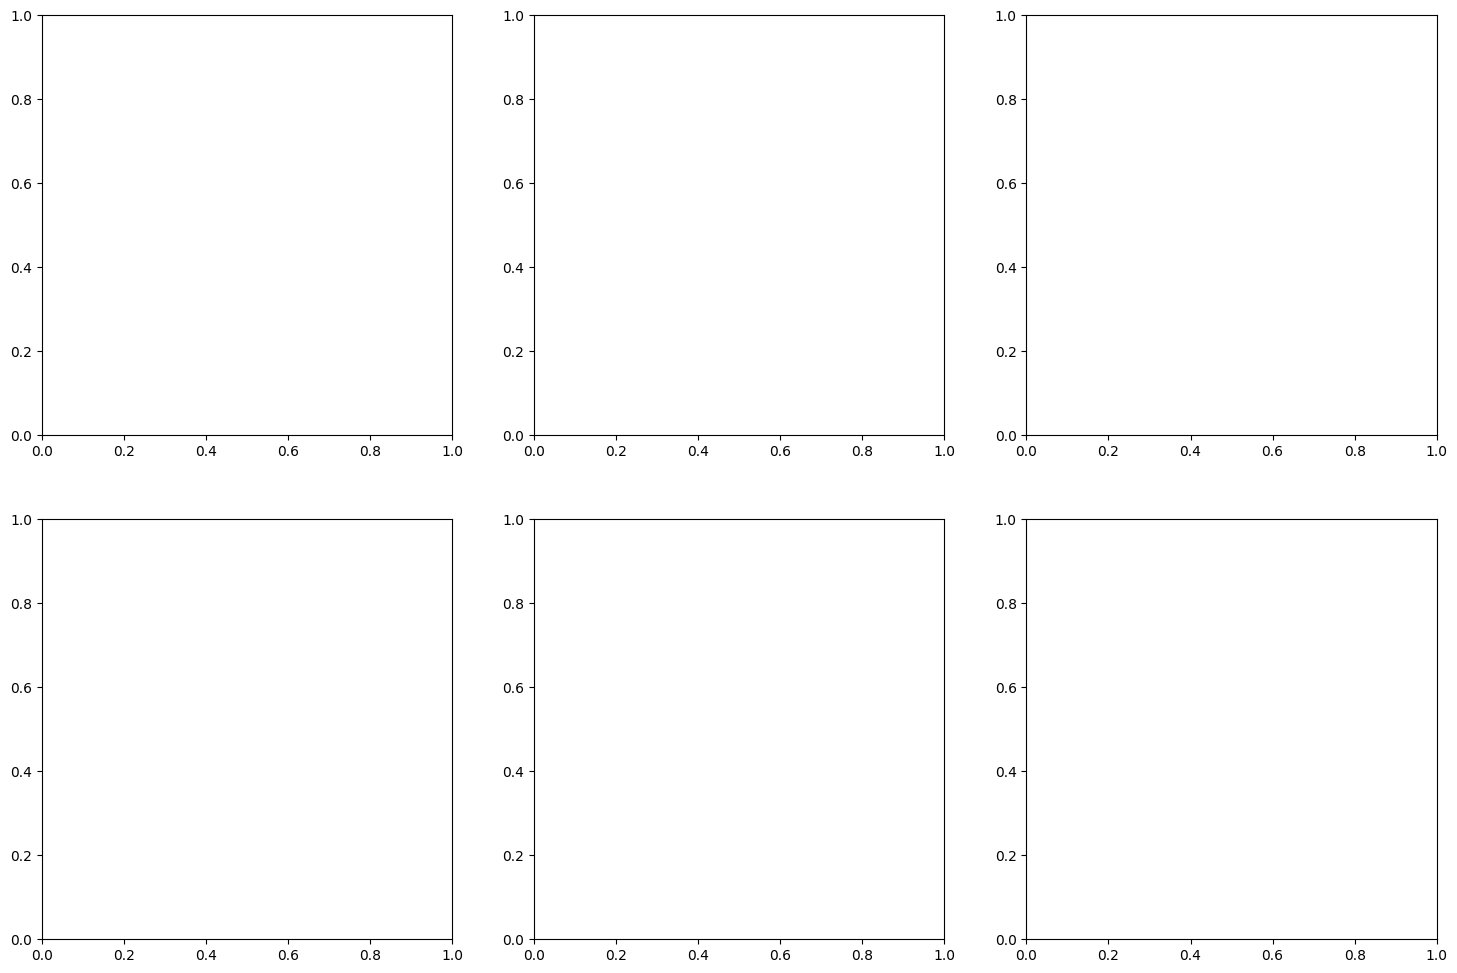

In [19]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

In [20]:
# Rating distribution
axes[0, 0].hist(df_high_quality['Rating_Clean'], bins=5, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

Text(4.444444444444452, 0.5, 'Count')

In [21]:
# Category distribution
category_counts = df_high_quality['Product Category'].value_counts()
axes[0, 1].bar(category_counts.index, category_counts.values, color='lightcoral')
axes[0, 1].set_title('Product Category Distribution')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

In [22]:
# Fulfillment status distribution
status_counts = df_high_quality['Fulfillment Status'].value_counts()
axes[0, 2].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
axes[0, 2].set_title('Fulfillment Status Distribution')

Text(0.5, 1.0, 'Fulfillment Status Distribution')

In [23]:
# Order value distribution
axes[1, 0].hist(df_high_quality['Order Value'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Order Value Distribution')
axes[1, 0].set_xlabel('Order Value ($)')
axes[1, 0].set_ylabel('Count')

Text(4.444444444444452, 0.5, 'Count')

In [24]:
# Review length distribution
axes[1, 1].hist(df_high_quality['Review_Length'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Review Length Distribution')
axes[1, 1].set_xlabel('Review Length (characters)')
axes[1, 1].set_ylabel('Count')

Text(496.7973856209152, 0.5, 'Count')

In [25]:
# Monthly trends
monthly_reviews = df_high_quality.groupby('Month').size()
axes[1, 2].plot(monthly_reviews.index, monthly_reviews.values, marker='o', color='purple')
axes[1, 2].set_title('Reviews by Month')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Number of Reviews')
axes[1, 2].set_xticks(range(1, 13))

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

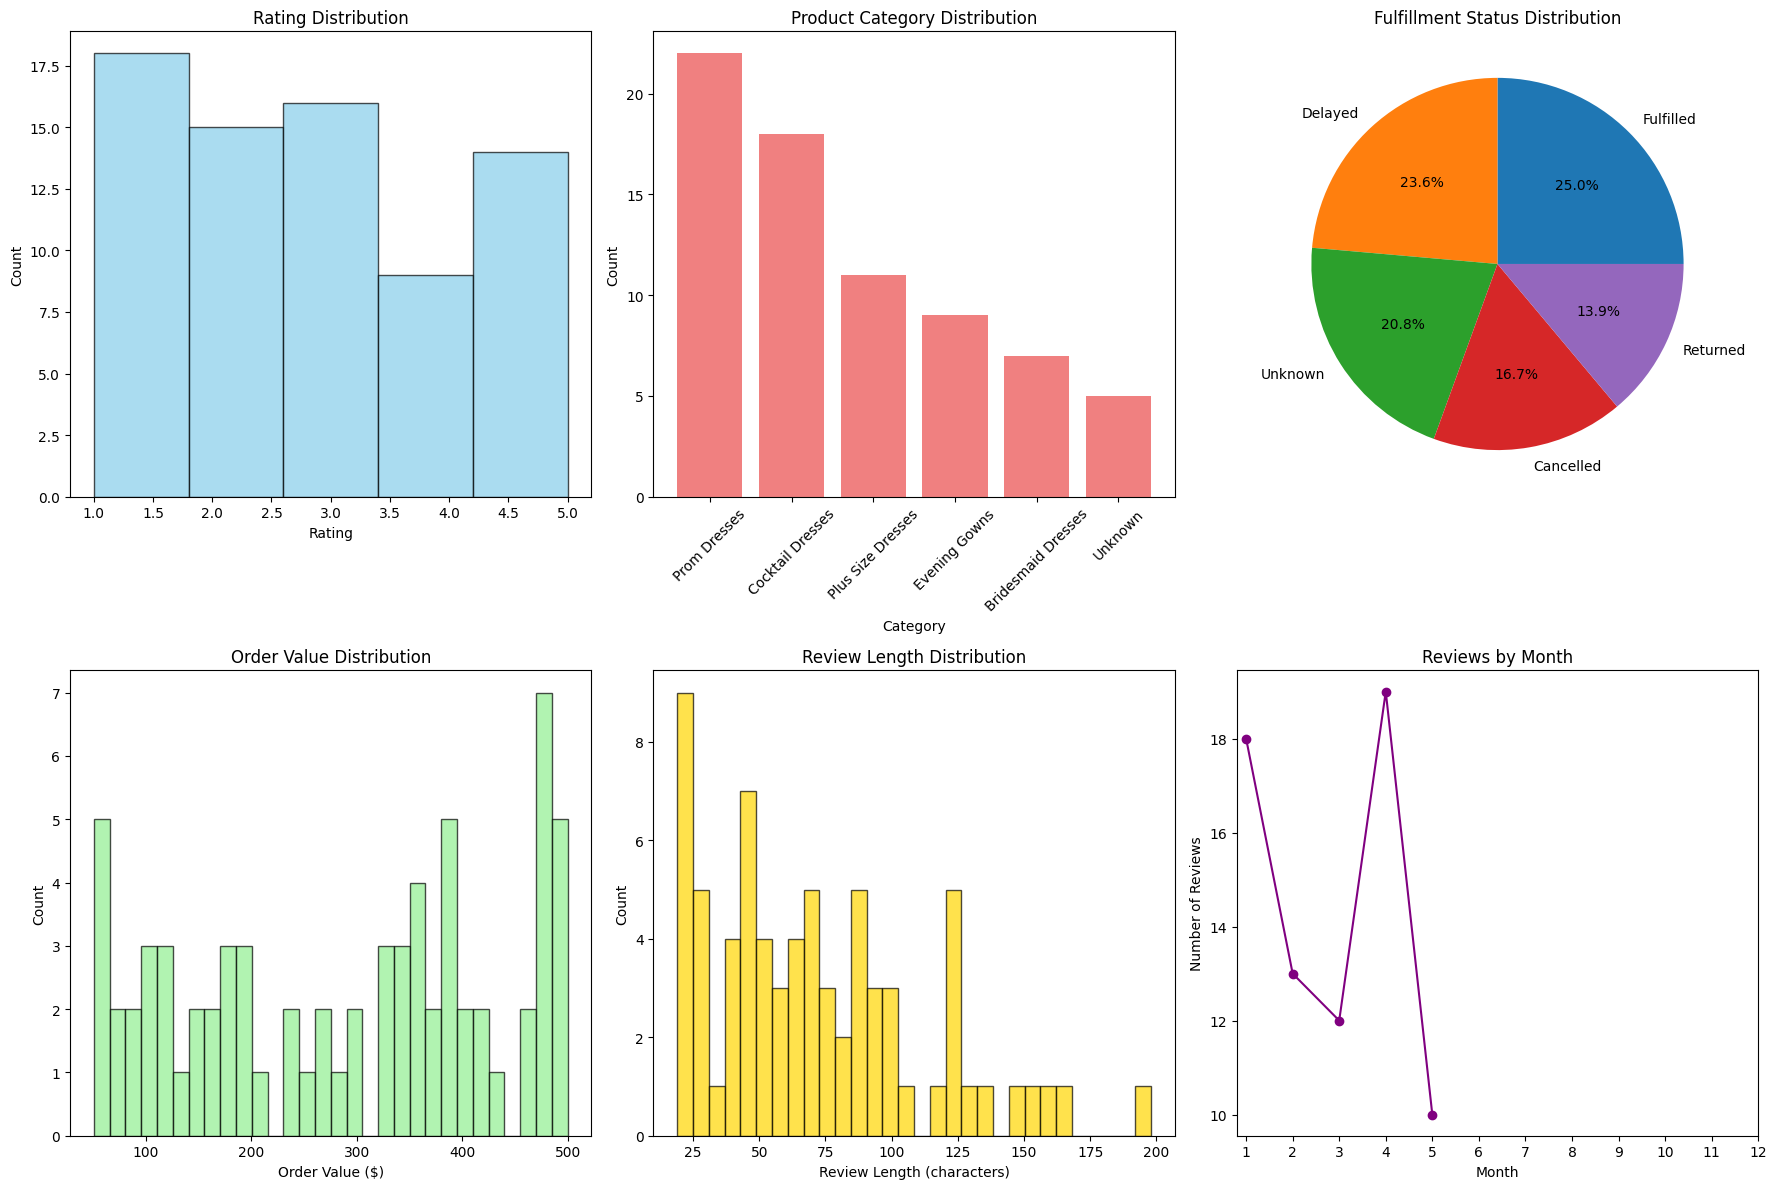

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Rating distribution
axes[0, 0].hist(df_high_quality['Rating_Clean'], bins=5, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

# Category distribution
category_counts = df_high_quality['Product Category'].value_counts()
axes[0, 1].bar(category_counts.index, category_counts.values, color='lightcoral')
axes[0, 1].set_title('Product Category Distribution')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Fulfillment status distribution
status_counts = df_high_quality['Fulfillment Status'].value_counts()
axes[0, 2].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
axes[0, 2].set_title('Fulfillment Status Distribution')

# Order value distribution
axes[1, 0].hist(df_high_quality['Order Value'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Order Value Distribution')
axes[1, 0].set_xlabel('Order Value ($)')
axes[1, 0].set_ylabel('Count')

# Review length distribution
axes[1, 1].hist(df_high_quality['Review_Length'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Review Length Distribution')
axes[1, 1].set_xlabel('Review Length (characters)')
axes[1, 1].set_ylabel('Count')

# Monthly trends
monthly_reviews = df_high_quality.groupby('Month').size()
axes[1, 2].plot(monthly_reviews.index, monthly_reviews.values, marker='o', color='purple')
axes[1, 2].set_title('Reviews by Month')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Number of Reviews')
axes[1, 2].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()



# EXPORT CLEANED DATA

In [28]:
# Select columns for final export
export_columns = [
    'Review ID', 'Product Name', 'Rating_Clean', 'Review Content', 
    'Timestamp', 'Customer Email', 'Product Category', 'Order Value_Imputed',
    'Fulfillment Status', 'Shipping Country', 'Year', 'Month', 'Day',
    'Review_Length', 'Review_Word_Count'
]

In [29]:
# Create final clean dataset
df_final = df_high_quality[export_columns].copy()

In [30]:
df_final.columns = [
    'Review_ID', 'Product_Name', 'Rating', 'Review_Content', 
    'Timestamp', 'Customer_Email', 'Product_Category', 'Order_Value',
    'Fulfillment_Status', 'Shipping_Country', 'Year', 'Month', 'Day',
    'Review_Length', 'Review_Word_Count'
]

In [31]:
# Display final dataset info
print("Final cleaned dataset:")
print(f"Shape: {df_final.shape}")
print(f"Columns: {list(df_final.columns)}")
print("\nFirst 5 rows of cleaned data:")
print(df_final.head())

Final cleaned dataset:
Shape: (72, 15)
Columns: ['Review_ID', 'Product_Name', 'Rating', 'Review_Content', 'Timestamp', 'Customer_Email', 'Product_Category', 'Order_Value', 'Fulfillment_Status', 'Shipping_Country', 'Year', 'Month', 'Day', 'Review_Length', 'Review_Word_Count']

First 5 rows of cleaned data:
                              Review_ID                      Product_Name  \
1  23b8c1e9-3924-46de-beb1-3b9046685257     Down-sized incremental matrix   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9     Polarized didactic initiative   
4  17fc695a-07a0-4a6e-8822-e8f36c031199  Adaptive human-resource firmware   
5  9a1de644-815e-46d1-bb8f-aa1837f8a88b   Persevering executive interface   
6  b74d0fb1-32e7-4629-8fad-c1a606cb0fb3     Total upward-trending toolset   

   Rating                                     Review_Content  \
1     1.0  Challenge reach throughout team those sing des...   
2     1.0                                Lead soon property.   
4     3.0  Interview trade knowledge c

In [32]:
df_final.to_csv('cleaned_customer_reviews.csv', index=False)


print("\n" + "="*60)
print("DATA CLEANING COMPLETE!")
print("="*60)
print("✅ Your cleaned dataset has been downloaded as 'cleaned_customer_reviews.csv'")
print("✅ Ready to feed into ChatGPT or other AI agents for analysis")
print("\nCleaning Summary:")
print(f"- Original records: {len(df)}")
print(f"- Cleaned records: {len(df_final)}")
print(f"- Data quality improvement: {(len(df_final)/len(df)*100):.1f}%")
print(f"- Average rating: {df_final['Rating'].mean():.2f}")
print(f"- Categories standardized: {df_final['Product_Category'].nunique()}")
print(f"- All timestamps standardized: ✅")
print(f"- All missing values handled: ✅")


DATA CLEANING COMPLETE!
✅ Your cleaned dataset has been downloaded as 'cleaned_customer_reviews.csv'
✅ Ready to feed into ChatGPT or other AI agents for analysis

Cleaning Summary:
- Original records: 100
- Cleaned records: 72
- Data quality improvement: 72.0%
- Average rating: 2.81
- Categories standardized: 6
- All timestamps standardized: ✅
- All missing values handled: ✅


In [33]:
import os

# Create a sample for AI analysis (if dataset is very large)
if len(df_final) > 1000:
    df_sample = df_final.sample(n=1000, random_state=42)
    print("✅ Created sample of 1000 records for AI analysis")
    
    # Save locally
    sample_path = 'sample_for_ai_analysis.csv'
    df_sample.to_csv(sample_path, index=False)

    # Print location
    abs_path = os.path.abspath(sample_path)
    print(f"📁 Sample saved at: {abs_path}")

else:
    print("✅ Dataset is manageable size - using full dataset for AI analysis")


✅ Dataset is manageable size - using full dataset for AI analysis


# PREPARE DATA FOR AI ANALYSIS

In [34]:
# Create summary statistics for AI context
summary_stats = {
    'total_reviews': len(df_final),
    'avg_rating': df_final['Rating'].mean(),
    'rating_distribution': df_final['Rating'].value_counts().to_dict(),
    'top_categories': df_final['Product_Category'].value_counts().head().to_dict(),
    'avg_order_value': df_final['Order_Value'].mean(),
    'fulfillment_status_dist': df_final['Fulfillment_Status'].value_counts().to_dict()
}

In [35]:
print("\nDataset Summary for AI Analysis:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

print("\n🎯 Your data is now clean and ready for AI analysis!")
print("📊 You can now upload the cleaned CSV to ChatGPT for insights, sentiment analysis, and recommendations!")


Dataset Summary for AI Analysis:
total_reviews: 72
avg_rating: 2.8055555555555554
rating_distribution: {1.0: 18, 3.0: 16, 2.0: 15, 5.0: 14, 4.0: 9}
top_categories: {'Prom Dresses': 22, 'Cocktail Dresses': 18, 'Plus Size Dresses': 11, 'Evening Gowns': 9, 'Bridesmaid Dresses': 7}
avg_order_value: 287.64250000000004
fulfillment_status_dist: {'Fulfilled': 18, 'Delayed': 17, 'Unknown': 15, 'Cancelled': 12, 'Returned': 10}

🎯 Your data is now clean and ready for AI analysis!
📊 You can now upload the cleaned CSV to ChatGPT for insights, sentiment analysis, and recommendations!
